<a href="https://colab.research.google.com/github/KasaHariPrasad82/Melonoma_skin_cancer/blob/main/KasaHariPrasad_NN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## Mount dataset from gdrive

from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'My Drive\Colab Notebooks\CNN_Assignment\Melanoma_dataset\ISIC_Images'



**This** assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
import pathlib

# Defining the path for train and test images
import pathlib

data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/CNN_Assignment/Melanoma_dataset/ISIC_Images/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/CNN_Assignment/Melanoma_dataset/ISIC_Images/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split = 0.2,
    subset="training",
    image_size=(180, 180),
    batch_size=batch_size,
    seed=123,
    label_mode='categorical')


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    image_size=(180, 180),
    batch_size=batch_size,
    seed=123,
    label_mode='categorical')


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

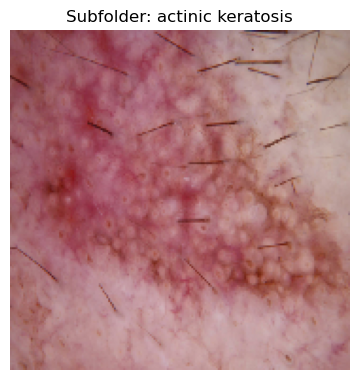

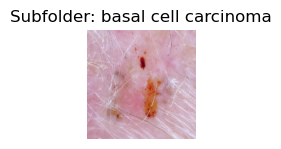

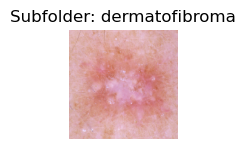

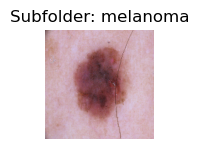

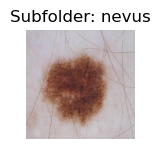

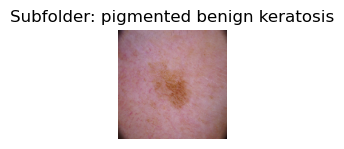

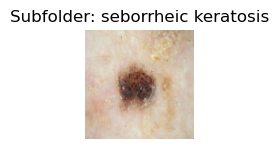

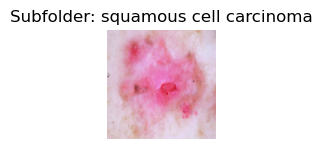

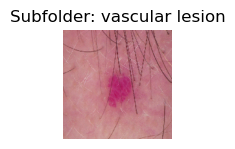

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

index = 0
plt.figure(figsize=(15,15))
# Visualize images from each subfolder
for subfolder in class_names:
    # Path to the current subfolder
    subfolder_path = os.path.join(data_dir_train, subfolder)

    # List of image files in the subfolder
    images = os.listdir(subfolder_path)

    # Choose a sample image from the subfolder
    sample_image = images[0]  # You can change this index to visualize different images

    # Load the image using keras.utils.load_img
    img = image.load_img(os.path.join(subfolder_path, sample_image),target_size=(180,180))

    # Plot the image
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(img)
    plt.title('Subfolder: ' + subfolder)
    plt.axis('off')
    plt.show()




### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model = Sequential()

#model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(180, 180,3),
    layers.Rescaling(1.0/255)
])
#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))



### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 71s 926ms/step - accuracy: 0.1600 - loss: 82.5247 - val_accuracy: 0.3221 - val_loss: 2.0375
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 834ms/step - accuracy: 0.2654 - loss: 2.4589 - val_accuracy: 0.2237 - val_loss: 2.1292
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 848ms/step - accuracy: 0.2238 - loss: 2.5157 - val_accuracy: 0.2058 - val_loss: 2.1060
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 824ms/step - accuracy: 0.2221 - loss: 2.2011 - val_accuracy: 0.2170 - val_loss: 2.0715
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 805ms/step - accuracy: 0.2337 - loss: 2.1910 - val_accuracy: 0.1969 - val_loss: 2.1886
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 825ms/step - accuracy: 0.2129 - loss: 2.1246 - val_accuracy: 0.2103 - val_loss: 2.0381
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 798ms/step - accuracy: 0.2353 - loss: 2.0171 - val_accuracy: 0.2058 - val_loss: 2.0362
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 830ms/step - accuracy: 0.2021 - loss: 1.9737 - val_acc

### Visualizing training results

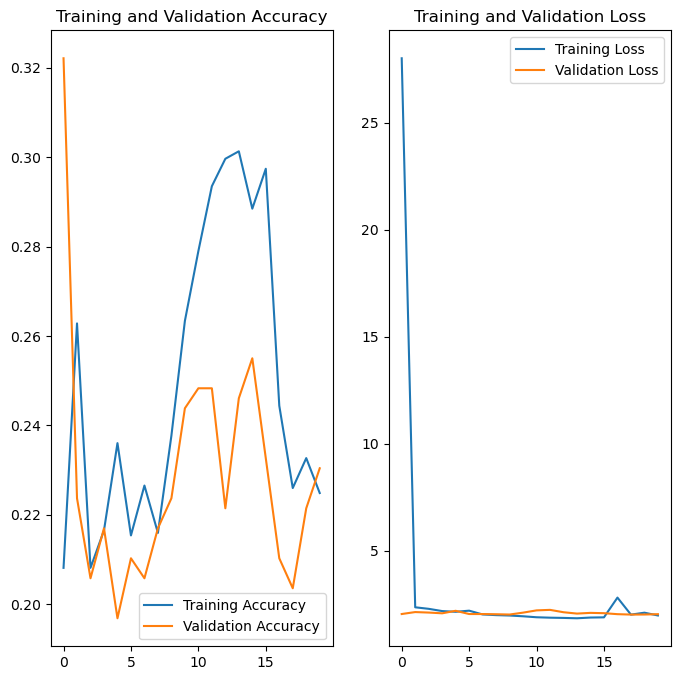

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



#### There seems to be overfitting of the model as per the accuracy results achieved

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F379FB4410>: 100%|██████████| 500/500 [00:11<00:00, 42.29 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F37A217F50>: 100%|██████████| 500/500 [00:11<00:00, 42.54 Samples/s]


Initialised with 95 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F37A227A10>: 100%|██████████| 500/500 [00:12<00:00, 40.54 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1F37A087750>: 100%|██████████| 500/500 [01:01<00:00,  8.17 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1F3700FDD50>: 100%|██████████| 500/500 [00:52<00:00,  9.45 Samples/s]                   


Initialised with 462 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F37A246E90>: 100%|██████████| 500/500 [00:12<00:00, 39.54 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1F37A1EAA90>: 100%|██████████| 500/500 [00:29<00:00, 16.83 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F37A0404D0>: 100%|██████████| 500/500 [00:12<00:00, 40.21 Samples/s]


Initialised with 139 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F37A20F110>: 100%|██████████| 500/500 [00:12<00:00, 39.10 Samples/s]                  


In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
#from keras.preprocessing import image
#classnames = [os.path.join(data_dir_train,fname) for fname in os.listdir(data_dir_train)]
#classnames =classnames[1:]
#fname=[os.path.join(path,fname) for path in classnames for fname in os.listdir(path)]
#img_path =fname[3]
#img= image.load_img(img_path,target_size=(180,180))
#x= image.img_to_array(img)
#x=x.reshape((1,)+x.shape)
#i=0
#plt.figure(figsize=(10,10))
#for batch in datagen.flow(x,batch_size=1):
#  plt.subplot(2,2,i+1)
#  imgplot= plt.imshow(image.array_to_img(batch[0]))
#  i+=1
#  if i%4==0:
#    break
#  plt.show()

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

#Sequential allows you to create models layer-by-layer
model = Sequential()

#model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(180, 180,3),
    layers.Rescaling(1.0/255)
])

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))



### Compiling the model

In [ ]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
#checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
#earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

### Training the model

In [ ]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 894ms/step - accuracy: 0.1502 - loss: 50.8114 - val_accuracy: 0.2058 - val_loss: 2.1866
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 812ms/step - accuracy: 0.1807 - loss: 2.1827 - val_accuracy: 0.2058 - val_loss: 2.1688
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 808ms/step - accuracy: 0.2106 - loss: 2.1653 - val_accuracy: 0.2058 - val_loss: 2.1514
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 812ms/step - accuracy: 0.2126 - loss: 2.1465 - val_accuracy: 0.2058 - val_loss: 2.1357
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 814ms/step - accuracy: 0.2015 - loss: 2.1311 - val_accuracy: 0.2058 - val_loss: 2.1215
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 828ms/step - accuracy: 0.2044 - loss: 2.1173 - val_accuracy: 0.2058 - val_loss: 2.1086
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 828ms/step - accuracy: 0.1887 - loss: 2.1083 - val_accuracy: 0.2058 - val_loss: 2.0973
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 836ms/step - accuracy: 0.2078 - loss: 2.0932 - val_acc

### Visualizing the results

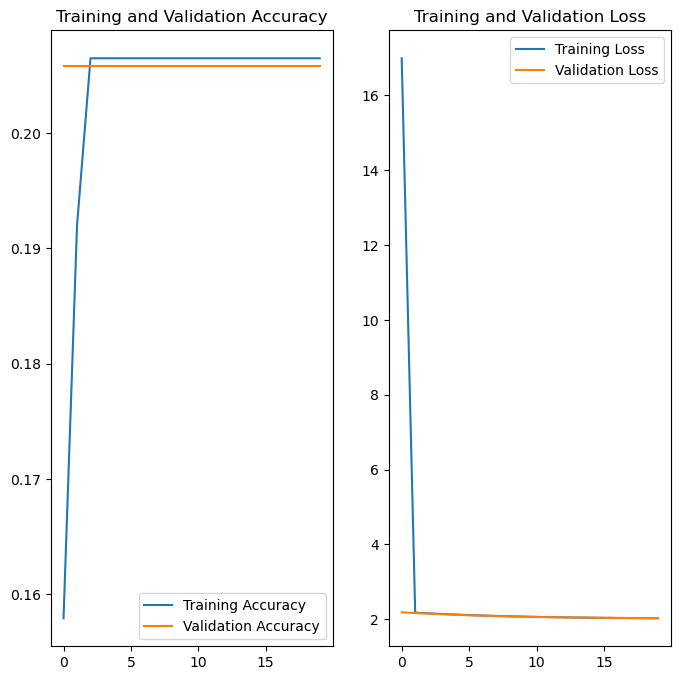

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<Axes: xlabel='No. of Image', ylabel='Class'>

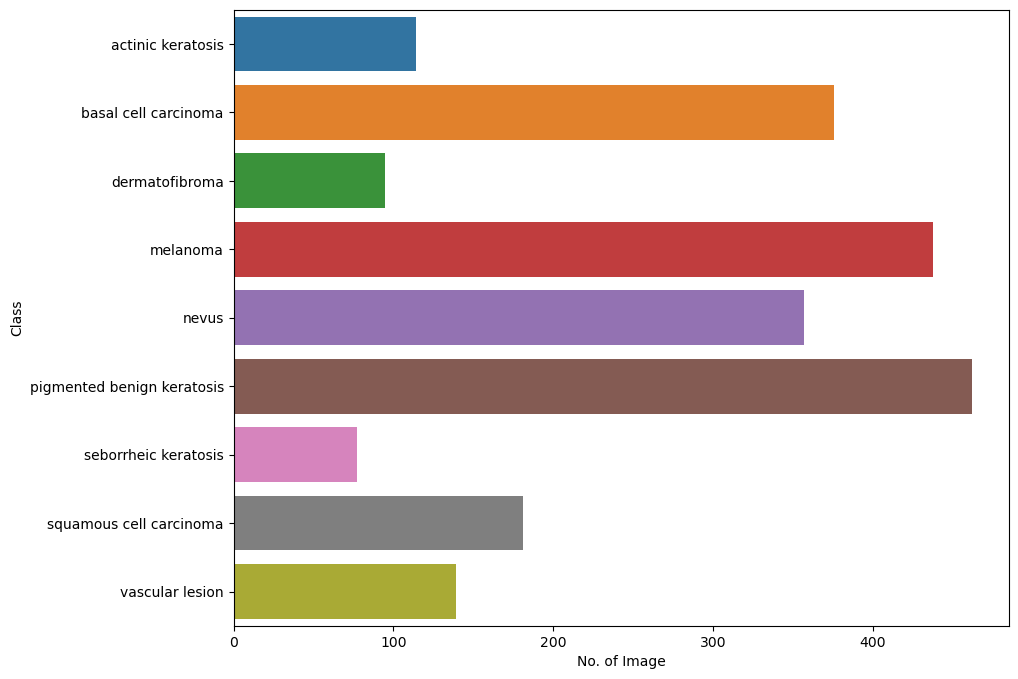

In [ ]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F37A11B1D0>: 100%|██████████| 500/500 [00:11<00:00, 42.71 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F3C4BE3290>: 100%|██████████| 500/500 [00:12<00:00, 41.54 Samples/s]


Initialised with 95 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F3C3804050>: 100%|██████████| 500/500 [00:12<00:00, 41.46 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1F3C4B533D0>: 100%|██████████| 500/500 [01:07<00:00,  7.43 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=724x542 at 0x1F37A09AC50>: 100%|██████████| 500/500 [00:53<00:00,  9.37 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F3C4B22F90>: 100%|██████████| 500/500 [00:12<00:00, 40.60 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1F3C382B2D0>: 100%|██████████| 500/500 [00:29<00:00, 16.95 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F3C4BE2710>: 100%|██████████| 500/500 [00:13<00:00, 37.73 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\Users\HP\Downloads\upgrad_learnings\CNN_Assignment\ISIC_Imges\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F3C37A31D0>: 100%|██████████| 500/500 [00:12<00:00, 38.82 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
from glob import glob
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\HP\\Downloads\\upgrad_learnings\\CNN_Assignment\\ISIC_Imges\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2153bdfc-ec7e-4603-be18-dab4d8b7cb95.jpg',
 'C:\\Users\\HP\\Downloads\\upgrad_learnings\\CNN_Assignment\\ISIC_Imges\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2ba5adce-04ac-4af2-b5f7-41d6c0d5f426.jpg',
 'C:\\Users\\HP\\Downloads\\upgrad_learnings\\CNN_Assignment\\ISIC_Imges\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_60dfa45b-4002-461e-a47e-f0ca9c5b787b.jpg',
 'C:\\Users\\HP\\Downloads\\upgrad_learnings\\CNN_Assignment\\ISIC_Imges\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_73eb5c68-789c-4185-8fad-da15a44e10dc.jpg',
 'C:\\Users\\HP\\Downloads\\upgrad_learnings\\CNN_Assignment\\ISIC_Imges\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7703a756-6ea4-4eda-8fd9-5c6c145297cf.jpg',
 'C:\\Users\\HP\\Download

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
path_list_new =[]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
original_df = pd.DataFrame({'Path': [], 'Label': []})
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = pd.concat([original_df, df2], ignore_index=True)

In [ ]:
new_df['Label'].value_counts()

Series([], Name: count, dtype: int64)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/MyDrive/Colab Notebooks/CNN_Assignment/Melanoma_dataset/ISIC_Images_Copy/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2357 files belonging to 2 classes.
Using 1886 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2357 files belonging to 2 classes.
Using 471 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
#Sequential allows you to create models layer-by-layer
model = Sequential()

#model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(180, 180,3),
    layers.Rescaling(1.0/255)
])
#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
#Compile the Model

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer='sgd',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



#### **Todo:**  Train your model

In [ ]:
epochs=5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8546 - loss: 0.9320 - val_accuracy: 0.9406 - val_loss: 0.4644
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9432 - loss: 0.2676 - val_accuracy: 0.9406 - val_loss: 0.4757
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9532 - loss: 0.1899 - val_accuracy: 0.9384 - val_loss: 0.2745
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9558 - loss: 0.1755 - val_accuracy: 0.9278 - val_loss: 0.3199
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9608 - loss: 0.1522 - val_accuracy: 0.9384 - val_loss: 0.3146


In [ ]:
epochs = 5
## Your code goes here, use 50 epochs.
history1 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9524 - loss: 0.1769 - val_accuracy: 0.9363 - val_loss: 0.2832
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9652 - loss: 0.1121 - val_accuracy: 0.9427 - val_loss: 0.3216
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9581 - loss: 0.1058 - val_accuracy: 0.9342 - val_loss: 0.3047
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9536 - loss: 0.1236 - val_accuracy: 0.9427 - val_loss: 0.3348
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9655 - loss: 0.0962 - val_accuracy: 0.9193 - val_loss: 0.3181


In [ ]:
epochs = 5
## Your code goes here, use 50 epochs.
history2 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9702 - loss: 0.0864 - val_accuracy: 0.9406 - val_loss: 0.2667
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9670 - loss: 0.0989 - val_accuracy: 0.9448 - val_loss: 0.3580
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9720 - loss: 0.0715 - val_accuracy: 0.9448 - val_loss: 0.3331
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9763 - loss: 0.0606 - val_accuracy: 0.9406 - val_loss: 0.3757
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9807 - loss: 0.0537 - val_accuracy: 0.9278 - val_loss: 0.4154


In [ ]:
epochs = 5
## Your code goes here, use 50 epochs.
history3 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9799 - loss: 0.0605 - val_accuracy: 0.9427 - val_loss: 0.3523
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9807 - loss: 0.0529 - val_accuracy: 0.9427 - val_loss: 0.3929
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9813 - loss: 0.0614 - val_accuracy: 0.9427 - val_loss: 0.4988
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9794 - loss: 0.0444 - val_accuracy: 0.9406 - val_loss: 0.4031
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9830 - loss: 0.0404 - val_accuracy: 0.9448 - val_loss: 0.4790


#### **Todo:**  Visualize the model results

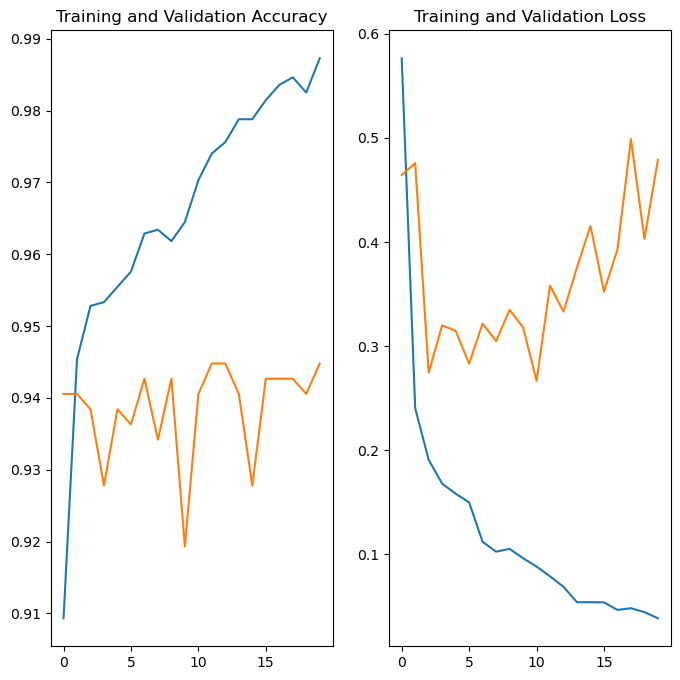

In [ ]:
acc = history.history['accuracy']+history1.history['accuracy']+history2.history['accuracy'] + history3.history['accuracy']
val_acc = history.history['val_accuracy']+history1.history['val_accuracy']+history2.history['val_accuracy'] +history3.history['val_accuracy']

loss = history.history['loss'] + history1.history['loss']+history2.history['loss']+history3.history['loss']
val_loss = history.history['val_loss'] + history1.history['val_loss'] + history2.history['val_loss']+history3.history['val_loss']


epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
#plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
#plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

